# **Customer Segmentation with K-Means Clustering**

**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


**Loading and Exploring the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('/Mall_Customers.csv')

# Display the first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Get basic statistics
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Preprocessing the Data**

In [4]:
# Drop any non-numeric columns if they exist
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


**Determining the Optimal Number of Clusters Using the Elbow Method**

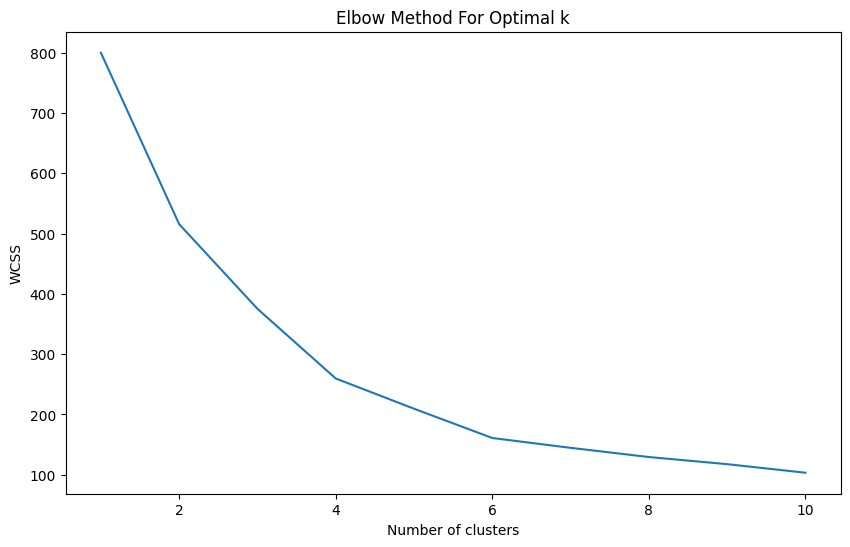

In [5]:
# Calculate WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**Applying K-Means Clustering**

In [6]:
# From the Elbow method, let's assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


**Visualizing the Clusters**

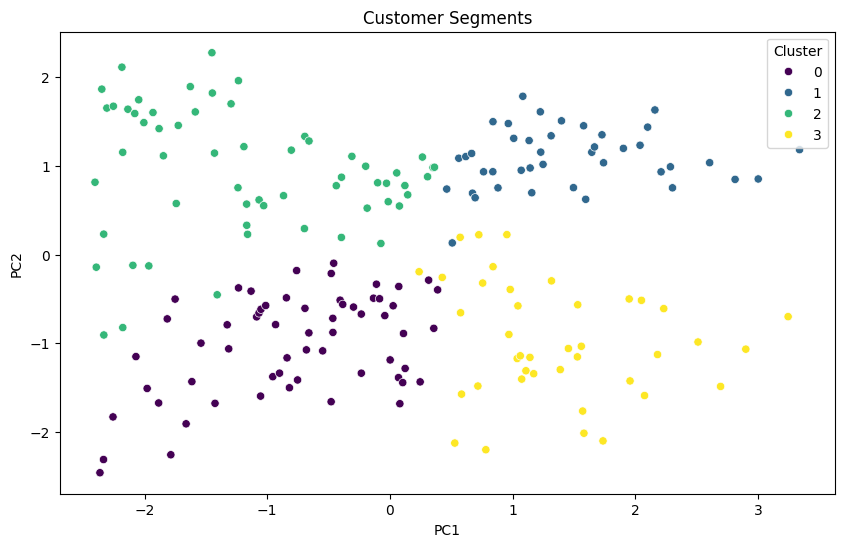

In [7]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Customer Segments')
plt.show()


**Analyzing the Clusters**

In [9]:
# Group by the clusters and calculate the mean of each feature
# Drop the 'Gender' column as it is not numeric
df_cluster_summary = df.drop('Gender', axis=1).groupby('Cluster').mean()

# Display the cluster summary
df_cluster_summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,69.350000,54.766667,47.933333,41.783333
1,160.048780,32.731707,85.634146,80.902439
2,50.610169,25.949153,38.779661,58.067797
3,159.775000,40.275000,85.925000,19.750000


In [11]:
# Save the dataframe with cluster labels to a new CSV file
df.to_csv('/content/Customer_Segmentation_with_Clusters.csv', index=False)
